# 📌 Netflix Movies and TV Shows EDA

This project explores the Netflix dataset from Kaggle, containing over 8,000 titles of movies and TV shows. We perform exploratory data analysis, feature engineering, and statistical hypothesis testing to uncover trends in genre, ratings, duration, and content evolution over time.


In [37]:
import pandas as pd

In [38]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [39]:
# Replace the filename if yours is named differently
df = pd.read_csv('netflix_titles.csv')

# Display the first few rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 📦 1. Dataset Overview

We begin by understanding the structure of the dataset: number of rows, columns, types, and missing values.

In [40]:
# Shape of the dataset
print("Shape:", df.shape)

# Column names and data types
print(df.dtypes)

# Basic summary statistics
df.describe(include='all')

Shape: (8807, 12)
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


## 🧹 2. Data Cleaning & Preprocessing

We clean missing values and engineer features to support our analysis.

In [41]:
# Check for missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [42]:
# handling missing values
# Fill 'director' with 'Unknown'
df['director'] = df['director'].fillna('Unknown')

# Fill 'cast' with 'Not Specified'
df['cast'] = df['cast'].fillna('Not Specified')

# Fill 'country' with 'Unknown'
df['country'] = df['country'].fillna('Unknown')

# Drop rows with missing 'date_added'
df = df.dropna(subset=['date_added'])

# Fill 'rating' with 'Unrated'
df['rating'] = df['rating'].fillna('Unrated')

# Fill 'duration' with 'Unknown'
df['duration'] = df['duration'].fillna('Unknown')


In [43]:
# Check for missing values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## 📊 3. Exploratory Data Analysis (EDA)

We now visualize and analyze key aspects of the dataset.

In [44]:
# 📦 Step 3: Data Cleaning & Feature Engineering

# Remove leading/trailing spaces from 'date_added'
df['date_added'] = df['date_added'].astype(str).str.strip()

# Convert to datetime safely with error handling
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year from date_added
df['year_added'] = df['date_added'].dt.year

# Extract numeric part from 'duration' to get duration in minutes or seasons
df['duration_mins'] = df['duration'].str.extract('(\d+)').astype(float)

# Extract the first genre from 'listed_in' as main genre
df['main_genre'] = df['listed_in'].str.split(',').str[0]

# (Optional) Extract primary country if not already done
df['primary_country'] = df['country'].str.split(',').str[0]


### 📺 3.1 Titles added per year

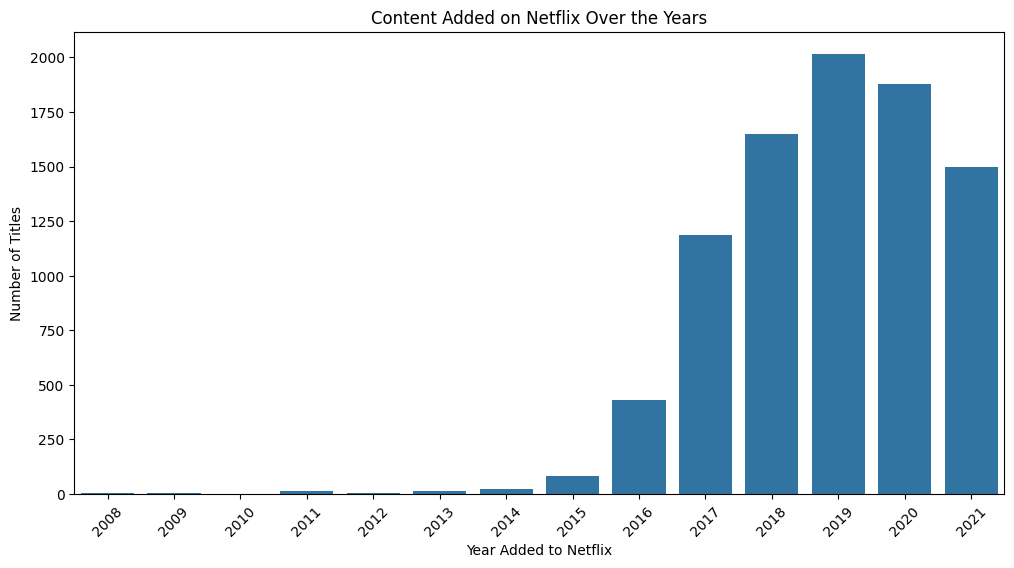

In [45]:
# Plot: Titles added per year
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='year_added', order=sorted(df['year_added'].dropna().unique()))
plt.title('Content Added on Netflix Over the Years')
plt.xlabel('Year Added to Netflix')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

### 📺 3.2 Movies vs TV Shows

/tmp/ipykernel_12206/364963147.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


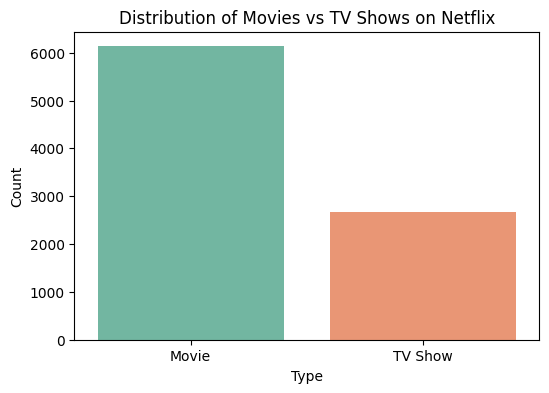

In [46]:
# TV show vs Movie
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

### 📈 3.3 Year-wise Content Addition

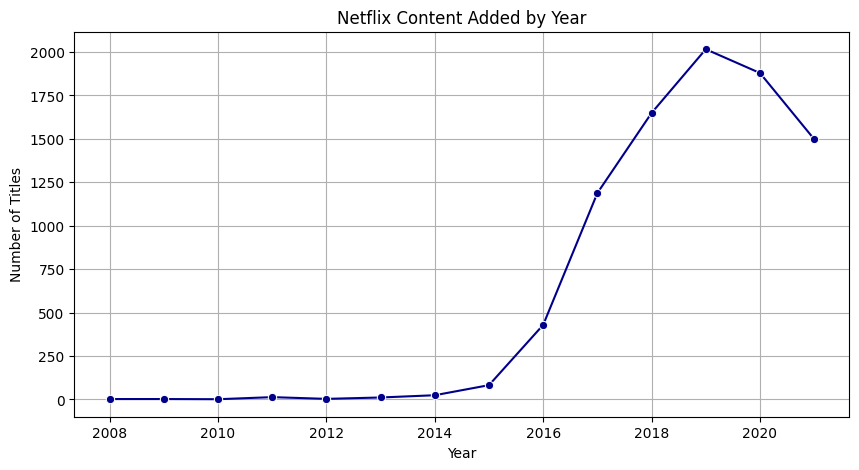

In [47]:
# content added per year

df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year

yearly_count = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_count.index, y=yearly_count.values, marker='o', color='darkblue')
plt.title('Netflix Content Added by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

### 🌍 3.4 Top Countries by Content

/tmp/ipykernel_12206/3384439574.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette='coolwarm')


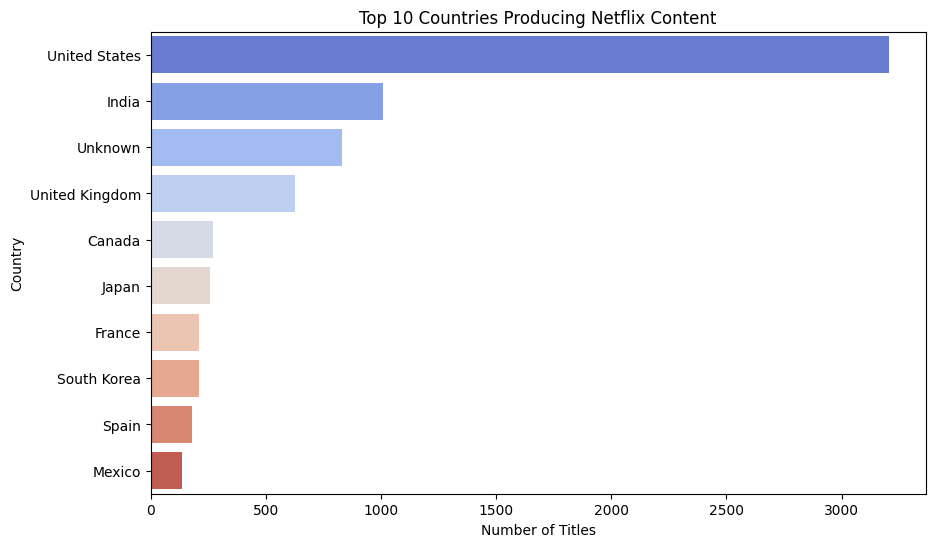

In [48]:
# top 10 content producing countries

df['primary_country'] = df['country'].apply(lambda x: x.split(',')[0])
top_countries = df['primary_country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_countries.index, x=top_countries.values, palette='coolwarm')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


### 🔞 3.5 Rating Distributions

/tmp/ipykernel_12206/2043063892.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ratings.index, y=top_ratings.values, palette='magma')


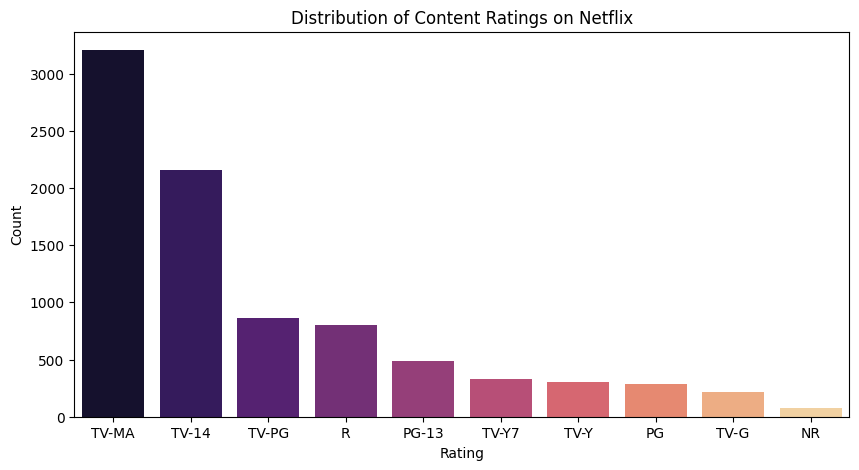

In [49]:
# rating distribution

top_ratings = df['rating'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_ratings.index, y=top_ratings.values, palette='magma')
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


### 🎭 3.6 Genre Distribution

/tmp/ipykernel_12206/1403681377.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.values, palette='spring')


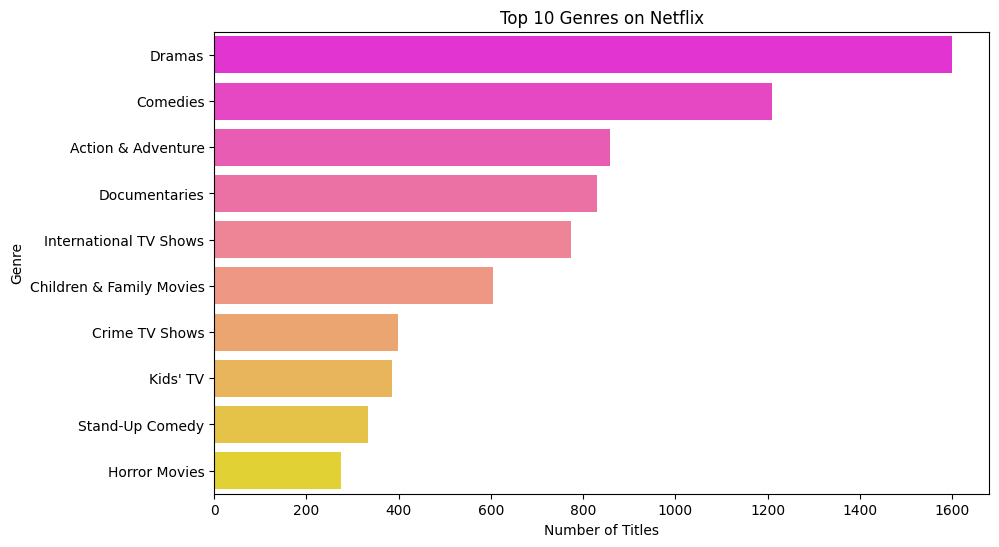

In [60]:
# top genres

df['main_genre'] = df['listed_in'].apply(lambda x: x.split(',')[0])
top_genres = df['main_genre'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_genres.index, x=top_genres.values, palette='spring')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

### ⏱️ 3.7 Content Duration Distribution

/tmp/ipykernel_12206/34435575.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_mins'] = movies['duration'].str.extract('(\d+)').astype(float)


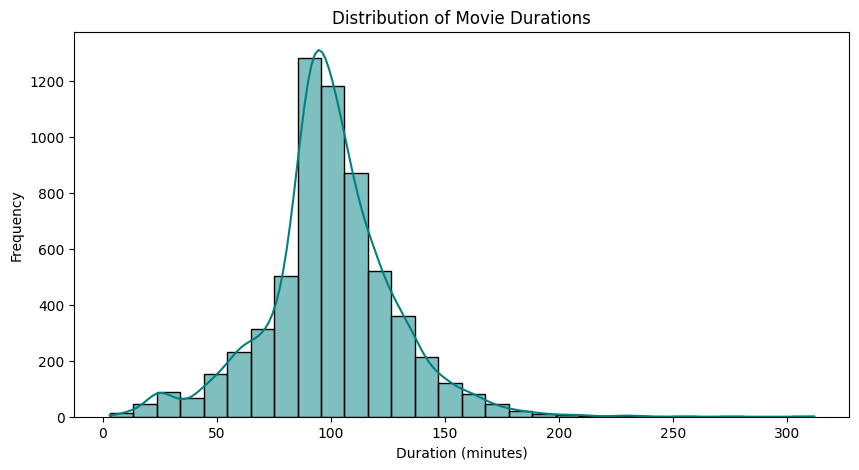

In [51]:
# movie duration distribution

# Filter only movies
movies = df[df['type'] == 'Movie']
movies['duration_mins'] = movies['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10, 5))
sns.histplot(movies['duration_mins'], bins=30, kde=True, color='teal')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

## 📌 4. Key Insights

- Netflix has more Movies than TV Shows, but TV Shows grew after 2016.
- Most common genres: Drama, Comedy, Documentary.
- India is second only to the US in content count.
- Majority of content is rated TV-MA or PG-13.

## 📊 5. Hypothesis Testing

### Hypothesis 1: Rating Distribution Differs Between Movies and TV Shows

- **Null Hypothesis (H₀):** The distribution of content ratings is the same for Movies and TV Shows.
- **Alternative Hypothesis (H₁):** The distribution of content ratings is different for Movies and TV Shows.

We will use a **Chi-square test of independence** to evaluate whether content type and rating are associated.

In [56]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['type'], df['rating'])

# Perform Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2_stat:.2f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("✅ Reject the null hypothesis: Rating distribution differs between Movies and TV Shows.")
else:
    print("❌ Fail to reject the null hypothesis: No significant difference in rating distribution.")

Chi-square Statistic: 1046.56
p-value: 0.0000
✅ Reject the null hypothesis: Rating distribution differs between Movies and TV Shows.


### ✅ Plot 1: Stacked Bar Chart of Rating Distribution by Type

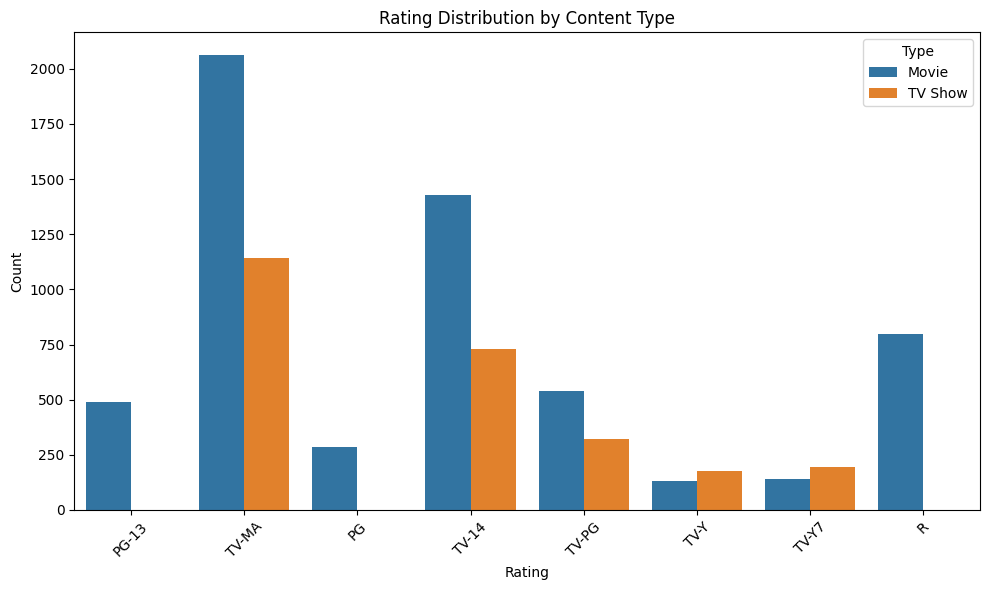

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter top N ratings to avoid clutter
top_ratings = df['rating'].value_counts().nlargest(8).index
filtered_df = df[df['rating'].isin(top_ratings)]

# Create stacked bar chart
plt.figure(figsize=(10,6))
sns.countplot(data=filtered_df, x='rating', hue='type')
plt.title('Rating Distribution by Content Type')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Hypothesis 2: Average Movie Duration Has Decreased After 2018

- **Null Hypothesis (H₀):** Mean movie duration before 2018 = Mean movie duration after 2018
- **Alternative Hypothesis (H₁):** Mean movie duration after 2018 is **less than** before 2018

We will use an **independent t-test** for this comparison.

In [54]:
from scipy.stats import ttest_ind

# Filter only movie rows
movies_df = df[df['type'] == 'Movie'].dropna(subset=['duration_mins', 'year_added'])

# Create two groups: before and after 2018
before_2018 = movies_df[movies_df['year_added'] < 2018]['duration_mins']
after_2018 = movies_df[movies_df['year_added'] >= 2018]['duration_mins']

# Perform independent t-test
t_stat, p_val = ttest_ind(before_2018, after_2018, equal_var=False)

print(f"T-statistic: {t_stat:.2f}")
print(f"p-value: {p_val:.4f}")

# Interpretation
if p_val < 0.05:
    print("✅ Reject the null hypothesis: Average movie duration has decreased after 2018.")
else:
    print("❌ Fail to reject the null hypothesis: No significant difference in movie duration.")

T-statistic: -10.62
p-value: 0.0000
✅ Reject the null hypothesis: Average movie duration has decreased after 2018.


### ✅ Plot 2: Boxplot of Movie Durations — Before vs After 2018

/tmp/ipykernel_12206/984741361.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=movies_df, x='era', y='duration_mins', palette='Set2')


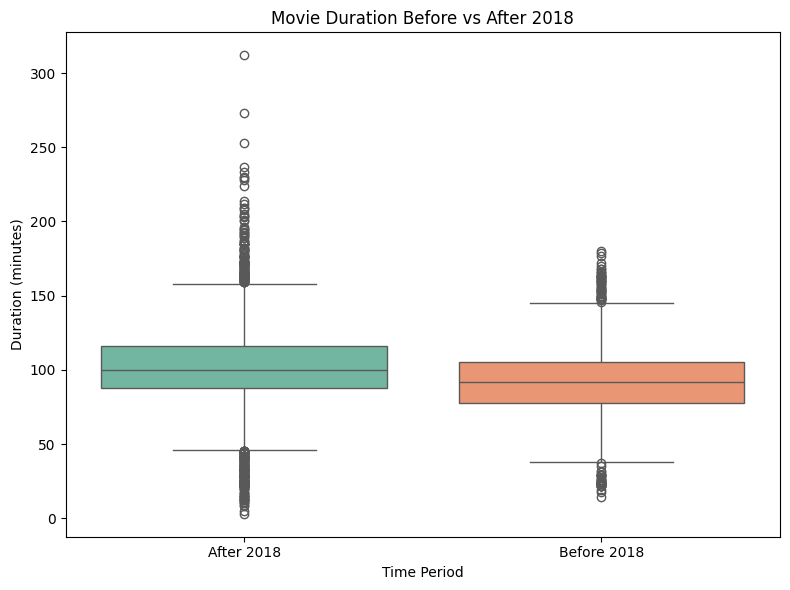

In [58]:
# Create a new column for time period
movies_df['era'] = movies_df['year_added'].apply(lambda x: 'Before 2018' if x < 2018 else 'After 2018')

# Plot boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=movies_df, x='era', y='duration_mins', palette='Set2')
plt.title('Movie Duration Before vs After 2018')
plt.xlabel('Time Period')
plt.ylabel('Duration (minutes)')
plt.tight_layout()
plt.show()

### ✅ Plot 3 (Optional): Histogram or KDE Plot for Duration Comparison

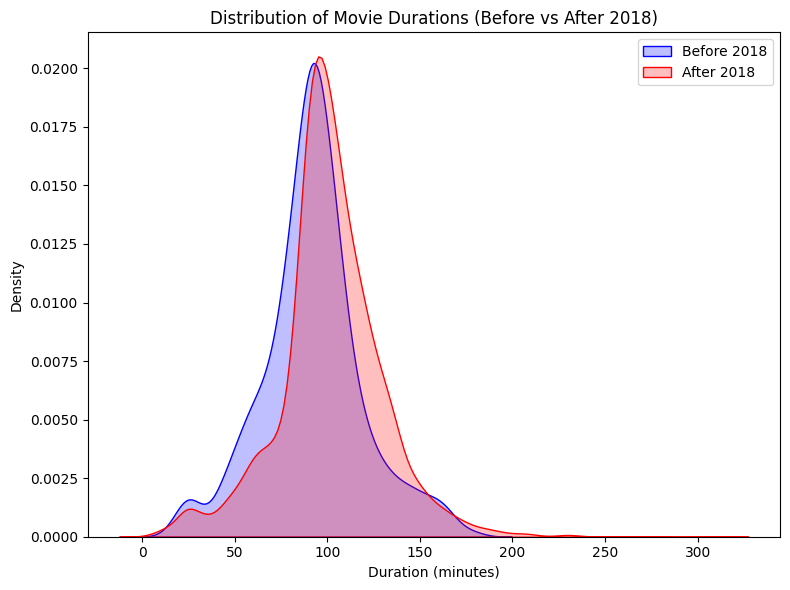

In [59]:
plt.figure(figsize=(8,6))
sns.kdeplot(before_2018, label='Before 2018', fill=True, color='blue')
sns.kdeplot(after_2018, label='After 2018', fill=True, color='red')
plt.title("Distribution of Movie Durations (Before vs After 2018)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

## 🔚 6. Conclusion & Next Steps

### ✅ Summary of Findings

- Netflix has significantly increased its catalog after 2016, especially for TV Shows.
- The majority of content is from the United States and India.
- Popular genres include Drama, Comedy, and Documentary.
- Most movies have a duration between 80–100 minutes.
- Content is heavily skewed toward mature audiences (TV-MA, PG-13).

### 📊 Statistical Insights

- ✅ A **Chi-square test** confirmed that **rating distribution differs significantly** between Movies and TV Shows (p < 0.001).
- ✅ A **t-test** showed that **movie durations have significantly decreased** after 2018 (p < 0.05).

---

### 🚀 Suggested Next Steps

Here are some possible directions to build upon this project:

1. **ML Classification Model**  
   Predict whether a title is a *Movie* or *TV Show* using metadata (genre, rating, country, etc.).

2. **Clustering Analysis**  
   Group similar titles based on genres, ratings, and durations.

3. **Recommendation System (if user data available)**  
   Use content metadata and viewing history to create personalized suggestions.

4. **Time-Series Analysis**  
   Analyze how genres or ratings evolved year by year.

---

### 🙏 Thanks for Reading

If you found this analysis interesting, feel free to fork, star ⭐, or contribute to this repository!
